# CART Practice Assessment

## The dataset provides the information on patients whether they have breast cancer or not. To decide that there are variables that help deciding whether the tumor is benign or malignant. Create a CART model to predict whether a tumor is benign or malignant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Get the Data

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


**Get Summary Statistics**

Hint: Use Describe

In [4]:
df.iloc[:, 1:].describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


**Get the top five rows**

In [5]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


## Data Cleaning

**Check Null Values**

In [6]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

**Check Data Types**

In [12]:
df.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

**There is one object type, we need to check what it is and which feature it is in**

In [14]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [15]:
df[df['Bare Nuclei']!='?']['Bare Nuclei'].astype('int').median()

1.0

**Replace '?' with median value of Bare Nuclei**

In [16]:
df.replace('?',1,inplace=True)

**Convert the Object Data Type 'Bare Nuclei' to int64**

In [17]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [18]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

## EDA

**Check Class Counts (0s and 1s) in Target Variable**

In [19]:
df['Class'].value_counts()

0    458
1    241
Name: Class, dtype: int64

**Check the % of 0s and 1s in Target Variable  Class**

In [20]:
print("Percentage of 0's",round(df.Class.value_counts().values[0]/df.Class.count()*100,2),'%')
print("Percentage of 1's",round(df.Class.value_counts().values[1]/df.Class.count()*100,2),'%')

Percentage of 0's 65.52 %
Percentage of 1's 34.48 %


**Plot the distribution of each variable**

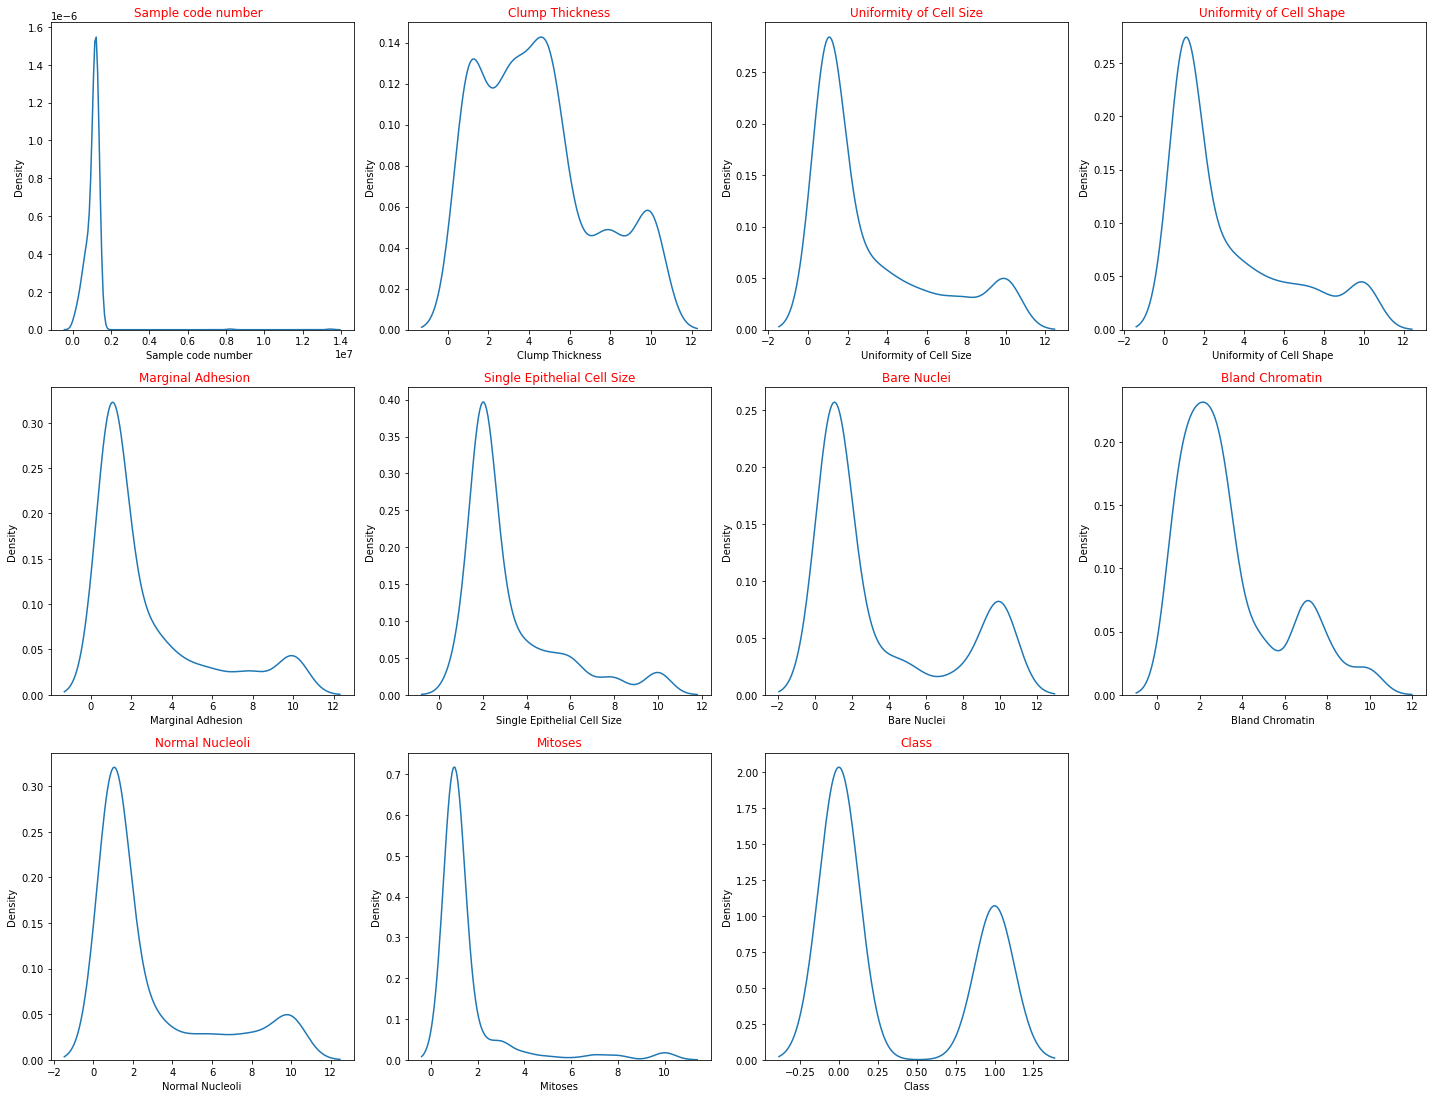

In [21]:
data_plot=df
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

**Plot Correlation Map**

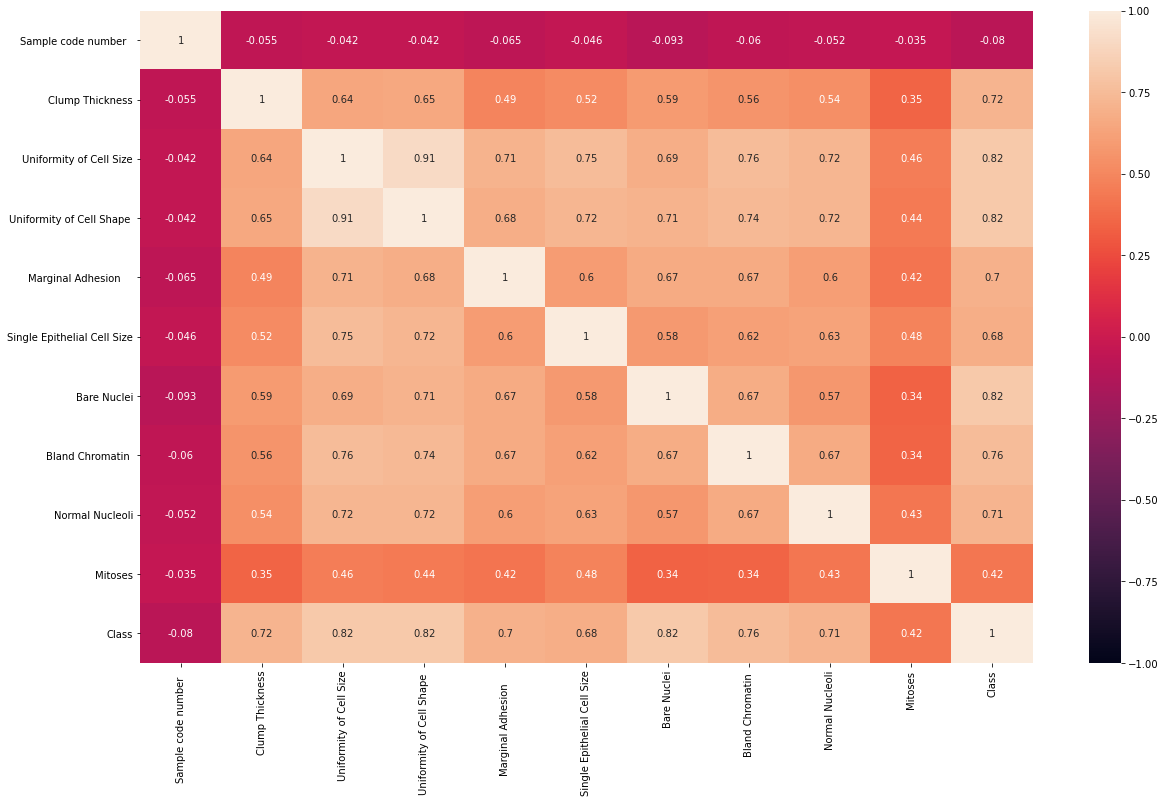

In [24]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True);

**Variables Uniformity of Cell Size, Uniformity of Cell Shape are highly positively correlated with each other (0.91)**

**Variables Uniformity of Cell Size, Uniformity of Cell Shape, Bare Nuclei are highly positively correlated with Target Variable 'Class'**

**Variable Mitosis has moderate positive correlation with Target Variable**

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['Class','Sample code number  '],axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [28]:
dtree = DecisionTreeClassifier(random_state=123)

In [29]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

## Predictions and Evaluation of Decision Tree

In [30]:
predictions = dtree.predict(X_test)

**Print Feature Importances**

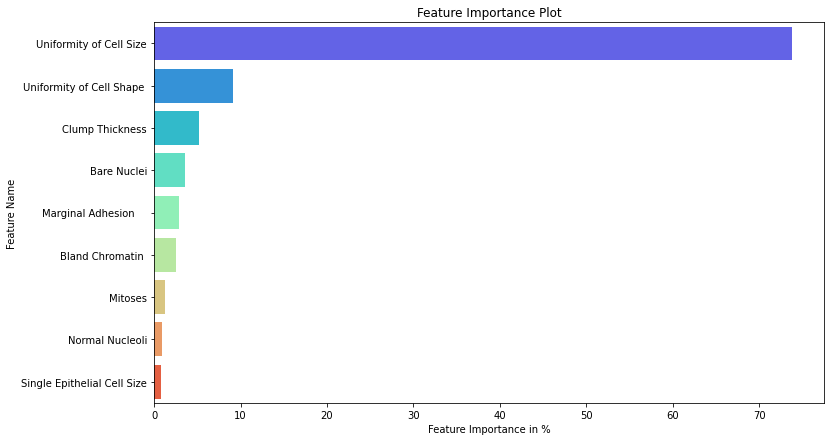

In [31]:
x=pd.DataFrame(dtree.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve, plot_confusion_matrix

**Print Classification Report**

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       129
           1       0.92      0.89      0.91        81

    accuracy                           0.93       210
   macro avg       0.93      0.92      0.92       210
weighted avg       0.93      0.93      0.93       210



**Print Confusion Matrix**

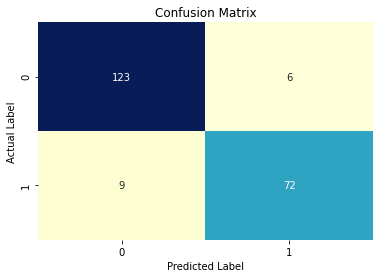

In [35]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

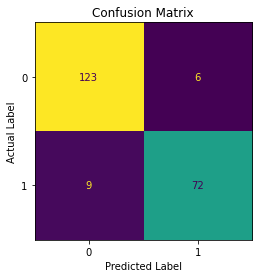

In [38]:
plot_confusion_matrix(dtree, X_test,y_test,colorbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

**Print Accuracy Score**

In [40]:
round(accuracy_score(y_test,predictions),2)

0.93

**Print the Area Under the Curve**

In [42]:
round(roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1]),2)

0.92

**Plot ROC_Curve**

In [44]:
dt_fpr, dt_tpr,_=roc_curve(y_test,dtree.predict_proba(X_test)[:,1])

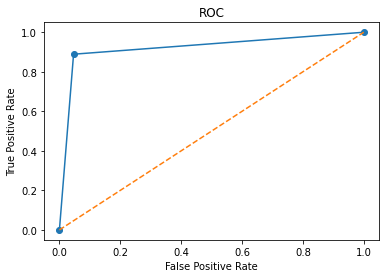

In [45]:
plt.plot(dt_fpr,dt_tpr, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


## Conclusion

